In [30]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import BarycentricInterpolator

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Leonardo Ortega Trujillo
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [2]:
data = {'t': [1.00, 1.01, 1.02, 1.03, 1.04], 'i': [3.10, 3.12, 3.14, 3.18, 3.24]}
df_voltaje = pd.DataFrame(data = data)
df_voltaje

,t,i
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [3]:
h = 0.01
diff_I_adelante = np.zeros(len(df_voltaje['t'])-1)
for i in range(len(df_voltaje['i']) - 1):
  diff_I_adelante[i] = (df_voltaje['i'][i+1] - df_voltaje['i'][i]) / h

diff_I_atras = np.zeros(len(df_voltaje['i']))
for i in range(1, len(df_voltaje['i'])):
  diff_I_atras[i] = (df_voltaje['i'][i] - df_voltaje['i'][i-1]) / h

diff_I_centro = np.zeros(len(df_voltaje['i']))
for i in range(1,len(df_voltaje['i'])-1):
  diff_I_centro[i] = (df_voltaje['i'].iloc[i+1] - df_voltaje['i'].iloc[i-1]) / 2*h


In [5]:
#diferencias finitas
h = 0.01
L = 0.98
R = 0.142

voltaje_adelante = np.zeros(len(diff_I_adelante))
voltaje_atras = np.zeros(len(diff_I_atras))
voltaje_centro = np.zeros(len(diff_I_centro))

for i in range(len(diff_I_adelante)):
  voltaje_adelante[i] = L*diff_I_adelante[i] + R*(df_voltaje['i'][i])

for i in range(len(diff_I_atras)):
   voltaje_atras[i] = L*diff_I_atras[i] + R*(df_voltaje['i'][i])

for i in range(len(diff_I_centro)):

  voltaje_centro[i] = L*diff_I_centro[i] + R*(df_voltaje['i'][i])

print(voltaje_adelante,voltaje_atras,voltaje_centro)

[2.4002  2.40304 4.36588 6.33156] [0.4402  2.40304 2.40588 4.37156 6.34008] [0.4402   0.443236 0.446174 0.45205  0.46008 ]


In [24]:
#Derivada de tres puntos
def derivada_3_puntos(y, h):

    n = len(y)
    derivative = np.zeros_like(y)  # Array para almacenar las derivadas

    for i in range(n):
        if i == 0:
            # Derivada adelantada
            derivative[i] = ((-3*y[i]) + (4*y[i+1]) - (y[i+2])) / 2*h
        elif i == n - 1:
            # Derivada atrasada
            derivative[i] = ((3*y[i]) - (4*y[i-1]) + (y[i-2])) / 2*h
        else:
            # Derivada centrada
            derivative[i] = (y[i + 1] - y[i - 1]) / (2 * h)

    return derivative

diff_3_corriente = derivada_3_puntos(df_voltaje['i'],h)
diff_3_corriente

array([2.e-04, 2.e+00, 3.e+00, 5.e+00, 7.e-04])

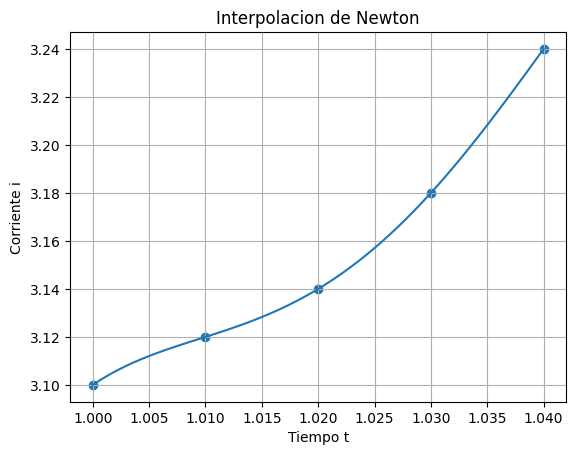

In [58]:
x = np.array(df_voltaje['t'])
y = np.array(df_voltaje['i'])
x_plot = np.linspace(min(x),max(x),100)

pol_interpolador = BarycentricInterpolator(x,y)
diff_pol_inter = pol_interpolador.derivative(x)

epsilon = np.zeros_like(y)
for i in range(len(diff_pol_inter)):
  epsilon = L * diff_pol_inter[i] + R * pol_interpolador(x_plot)


plt.scatter(x,y)
plt.plot(x_plot,pol_interpolador(x_plot))
plt.title('Interpolacion de Newton')
plt.xlabel('Tiempo t')
plt.ylabel('Corriente i')
plt.grid()
plt.show()

# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

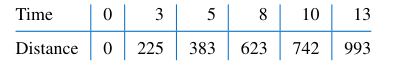



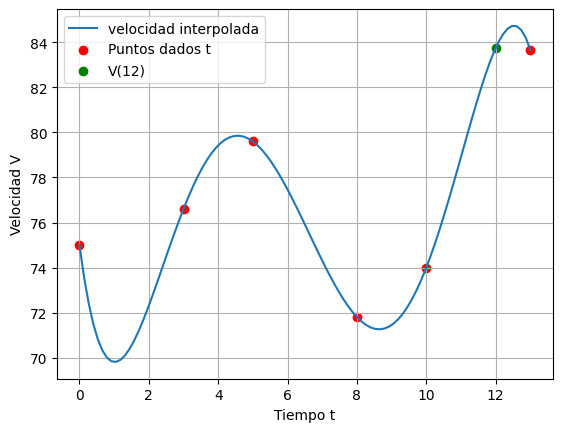

La velocidad en t = 12 es 83.752


In [92]:
#metodo interpolando
t = np.array([0,3,5,8,10,13])
d = np.array([0,225,383,623,742,993])
t_plot = np.linspace(min(t),max(t),100)
t_eval = 12
#la velocidad instantanea se calcula como v = d1 - d0 / t1 - t0
v = np.zeros(len(t))

#extremos
v[0] = (d[1] - d[0]) / (t[1] - t[0])
v[-1] = (d[-1] - d[-2]) / (t[-1] - t[-2])
#centro
for i in range(1, len(t)-1):
    v[i] = (d[i+1] - d[i-1]) / (t[i+1] - t[i-1])

v_interpolado = BarycentricInterpolator(t,v)

plt.plot(t_plot,v_interpolado(t_plot), label = 'velocidad interpolada')
plt.scatter(t,v, color = 'red', label = 'Puntos dados t')
plt.scatter(t_eval,v_interpolado(t_eval), color = 'green', label = 'V(12)')
plt.xlabel('Tiempo t')
plt.ylabel('Velocidad V')
plt.legend()
plt.grid()
plt.show()
print(f'La velocidad en t = 12 es {v_interpolado(t_eval)}')

# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

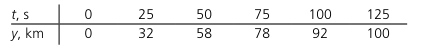

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

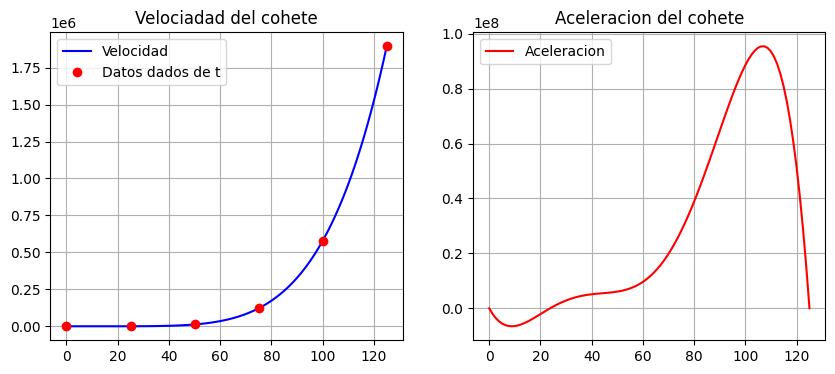

In [109]:
t_c = np.array([0,25,50,75,100,125])
d_c = np.array([0,32,58,78,92,100])
t_plot = np.linspace(min(t_c),max(t_c),100)
#la velocidad instantanea se calcula como v = d1 - d0 / t1 - t0
v_cohete = np.zeros(len(t_c))

#extremos
v_cohete[0] = (d_c[1] - d_c[0]) / (t_c[1] - t_c[0])
v_cohete[-1] = (d_c[-1] - d_c[-2]) / (t_c[-1] - t_c[-2])
#centro
for i in range(1, len(t_c)-1):
    v_cohete[i] = (d_c[i+1] - d_c[i-1]) / (t_c[i+1] - t_c[i-1])

v_cohete_interpolado = BarycentricInterpolator(t,v_cohete)

datos_vel = np.zeros_like(t_c) #datos de la velocidad en cada punto de t_c

for i in range(len(t_c)):
  datos_vel[i] = v_cohete_interpolado(t_c[i])

#encontramos la aceleracion haciendo la derivada numerica de los datos de la velocidad:
aceleracion = derivada_3_puntos(datos_vel,h)

aceleracion_interpolada = BarycentricInterpolator(t_c,aceleracion)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t_plot, v_cohete_interpolado(t_plot), 'b', label='Velocidad')
ax[0].plot(t_c,datos_vel, 'ro', label = 'Datos dados de t')
ax[0].set_title('Velociadad del cohete')
ax[0].grid()
ax[0].legend()

ax[1].plot(t_plot, aceleracion_interpolada(t_plot), 'r', label='Aceleracion')
ax[1].set_title('Aceleracion del cohete')
ax[1].grid()
ax[1].legend()

plt.show()


#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [151]:
#calculamos la derivada del potencial para encontrar el campo:
z,k,q = sp.symbols('z k q')
k = 1 / (4*np.pi*(8.854187817 * 10**-12))
q = 1
R = 0.01
v = (k*q) / sp.sqrt(z**2 + R**2)
v_diff = sp.diff(v,z)
electric_field = -1*v_diff
electric_field_func = sp.lambdify(z, electric_field, 'numpy')

electric_field_func(0.01)

31775794077793.008

In [160]:
#b)
z_vals = np.linspace(0.01, 1, 100)
V_vals = k*q / np.sqrt(z_vals**2 + R**2)
electric_field_numerico = -np.gradient(V_vals, z_vals)

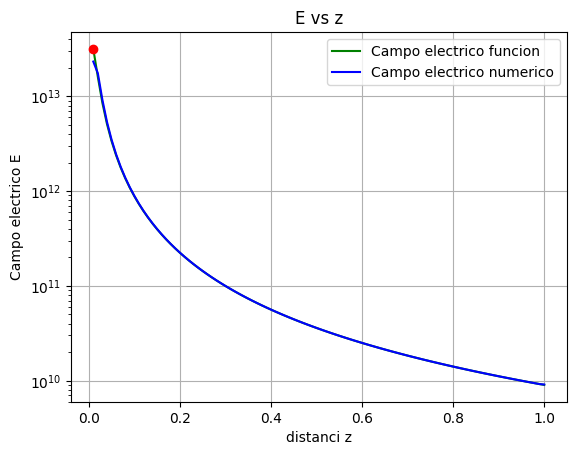

In [163]:
#c)
plt.plot(z_vals,electric_field_func(z_vals), 'g',label = 'Campo electrico funcion')
plt.plot(z_vals,electric_field_numerico,'b', label = 'Campo electrico numerico')
plt.plot(0.01,electric_field_func(0.01),'ro')
plt.title('E vs z')
plt.legend()
plt.yscale('log')
plt.xlabel('distanci z')
plt.ylabel('Campo electrico E')
plt.grid()
plt.show()
#ambos son muy similares excepto en cercanias al 0